# Mini Project 4

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In the lectures we explored how to delta hedge sold call options, resulting in a trading strategy whose profits are neutral to upward or downward drift in a stock path movements, provided the volatility, or $\sigma$, of the stock remained constant.

For this final mini project explore the impact of a non-constant $\sigma$ on the distribution of profits of hedging. You are also encouraged to explore/research a $\sigma$-hedging strategy and write code that simulates the profit distribution of the $\sigma$-hedging strategy. 

Below is some code you can customize that simulates a stock path whose $\sigma$ is not constant.

You are encouraged to use a different model for sigma than the one provided. You can use stock paths simulated by Heston model? You could use a GARCH model for volatility. The choice is yours and you can do your own research to choose how to model a stock movement. 

# Project Objective:

Explore how **non-constant volatility ($\sigma$)** affects the **profit distribution** of delta-hedging strategies for sold call options.

1. Simulate stock paths with **time-varying $\sigma$** (e.g., using Heston or GARCH models).
2. Analyze the **impact of non-constant $\sigma$** on delta-hedging profits.
3. Research and implement a **$\sigma$-hedging (vega-hedging)** strategy.
4. Simulate and compare the **profit distributions** of delta vs. $\sigma$-hedging.

(Encouraged to explore and customize the volatility model used in simulations.)

In [160]:
#Package Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from scipy.stats import norm
from scipy.stats import gaussian_kde


In [161]:
'''
def stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps):
    
    Generation of custom stock paths following Geometeric Brownian motion,
    but log-returns do not have constant volatility.
    
    Each step of the log-returns, there is a 
    1) 50% the volatility is .2
    2) 30% chance the volatility is .3
    3) 20% chance the volatility is .45
    
    Inputs:
    S0 (float): initial stock value
    t (float): time interval of stock path movements in years
    r (float): risk-free interest rate
    mu (float): drift of log-returns
    n_paths (int): number of stock paths
    n_steps (float): number of steps in each stock path
    
    Returns:
    
    Simulated stock paths
    
    
    #Noise in volatility
    noise = np.random.normal(0,1,size = (n_paths, n_steps))
    
    #Custom sigma that is not constant
    sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = (n_paths, n_steps))
    
    #Time increment between each step
    dt = t/n_steps
    
    #log-returns between each step
    increments = (mu + r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise
    
    #Cumulative log-returns at each step
    log_returns = np.cumsum(increments, axis = 1)
    
    
    #paths
    paths = S0*np.exp(log_returns)
    
    
    #Adjoint initial value S0 at start of each simulated path
    paths = np.insert(paths, 0, S0, axis = 1)
    
    
    return paths
'''
    

'\ndef stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps):\n    \n    Generation of custom stock paths following Geometeric Brownian motion,\n    but log-returns do not have constant volatility.\n    \n    Each step of the log-returns, there is a \n    1) 50% the volatility is .2\n    2) 30% chance the volatility is .3\n    3) 20% chance the volatility is .45\n    \n    Inputs:\n    S0 (float): initial stock value\n    t (float): time interval of stock path movements in years\n    r (float): risk-free interest rate\n    mu (float): drift of log-returns\n    n_paths (int): number of stock paths\n    n_steps (float): number of steps in each stock path\n    \n    Returns:\n    \n    Simulated stock paths\n    \n    \n    #Noise in volatility\n    noise = np.random.normal(0,1,size = (n_paths, n_steps))\n    \n    #Custom sigma that is not constant\n    sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = (n_paths, n_steps))\n    \n    #Time increment between each step\n    d

In [162]:
def sigma_t_func(t):
    return 0.2 + 0.1 * np.sin(2 * np.pi * t)

def stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps):
    dt = t / n_steps
    times = np.linspace(0, t, n_steps + 1)
    sigma_t = 0.2 + 0.1 * np.sin(2 * np.pi * times)  # sinusoidal volatility
    all_paths = []

    for _ in range(n_paths):
        path = [S0]
        for i in range(n_steps):
            sigma = sigma_t_func(times[i])
            Z = np.random.normal()
            dS = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
            S_new = path[-1] * np.exp(dS)
            path.append(S_new)
        all_paths.append(path)

    return np.array(all_paths), times
    

### Simulating a stock path whose $\sigma$ is not constant using a Sinusoidal time-varying model

Let the volatility at time $t$ (in years) be: $\sigma(t) = 0.2 + 0.1 \sin(2\pi t)$

- Baseline volatility = 0.2
- Amplitude of variation = 0.1
- $\sin(2\pi t)$ --> a sine wave with period 1 year

So, over the course of 1 year, the volatility goes through 1 full cycle, rising and falling like a wave.

Reason for choosing:

- Real market conditions often changes in cycles, due to earning seasons, economic reports, market sentiments, seasonality, etc.

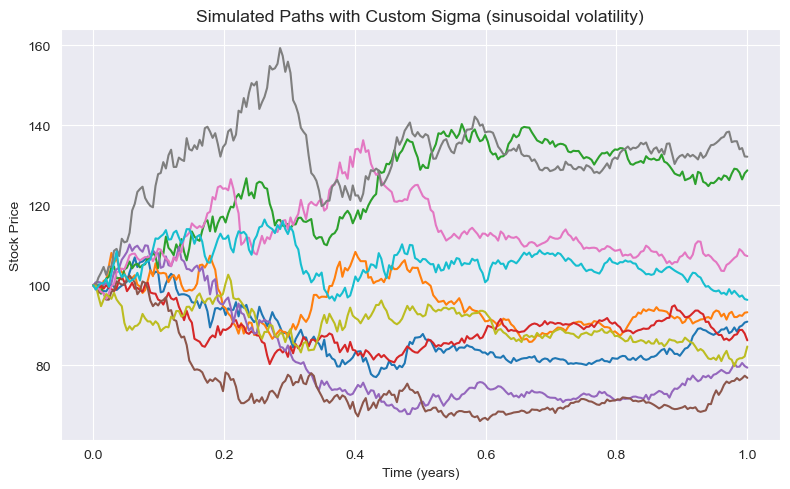

In [211]:
#100 Simulated paths of daily steps over 1-year period and plot

S0 = 100
T = 1
r = 0.039
mu = 0.275
n_paths = 100
n_steps = 252
K=100

dt = T / (n_steps - 1)
time_gridc = np.linspace(0, T, n_steps+1)

simulated_paths, times = stock_path_custom_sigma(S0, T, r, mu, n_paths, n_steps)

plt.figure(figsize=(8, 5))
num_paths_to_plot = min(10, len(simulated_paths))

for path in simulated_paths[:num_paths_to_plot]:
    plt.plot(time_gridc, path)

plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.title("Simulated Paths with Custom Sigma (sinusoidal volatility)", size=12.7)
plt.grid(True)
plt.tight_layout()
plt.show()

In the above plot, the stock price movements have been done for log returns that do not have a constant volatility.

In the next part, I will start by trying to Delta-Hedge using the Black-Scholes model (assuming a constant $\sigma$) and eventually determine the Profit and Loss (PnL) for non-constant volatility stock prices.

Steps I follow:

At each timestep:
- Calculate $\Delta$ from Black-Scholes
- Rebalance the portfolio by buying/selling $\Delta *$ stock
- Keep track of the cash account evolution

At expiry:
- Option payoff = $\text{Max}(S_T - K, 0)$
- Portfolio value = $\Delta_T * S_T + \text{cash}$
- Average Hedging Loss = PnL = Portfolio value - Option Payoff

**Aim:** To test if a hedging strategy that assumes constant volatility (like Black-Scholes) still performs well when volatility isn't constant.

In [164]:
#Defining Black-Scholes Delta

def bs_delta_call(S, K, r, sigma, T):
    with np.errstate(divide='ignore', invalid='ignore'): #to eliminate the possibility of dividing by 0 if T->0 or sigma=0
        d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
        delta = np.nan_to_num(norm.cdf(d1))
    return delta

### When trader assumes a constant volatility, $\sigma$

In [168]:
def simulate_delta_hedging(S_paths, K, r, sigma_guess, T):
    n_paths, n_steps = S_paths.shape
    dt = T / (n_steps - 1)
    pnl_list = []
    v_paths = np.full_like(S_paths, sigma_guess**2)  # constant volatility path

    for i, path in enumerate(S_paths):
        cash = 0
        delta_prev = 0
        for t in range(n_steps - 1):
            S_t = path[t]
            tau = T - t * dt
            delta = bs_delta_call(S_t, K, r, sigma_guess, tau)
            d_delta = delta - delta_prev
            cash -= d_delta * S_t
            cash *= np.exp(r * dt)
            delta_prev = delta

        S_T = path[-1]
        option_payoff = max(S_T - K, 0)
        portfolio_value = delta_prev * S_T + cash
        pnl = portfolio_value - option_payoff
        pnl_list.append(pnl), v_paths

    return np.array(pnl_list), v_paths

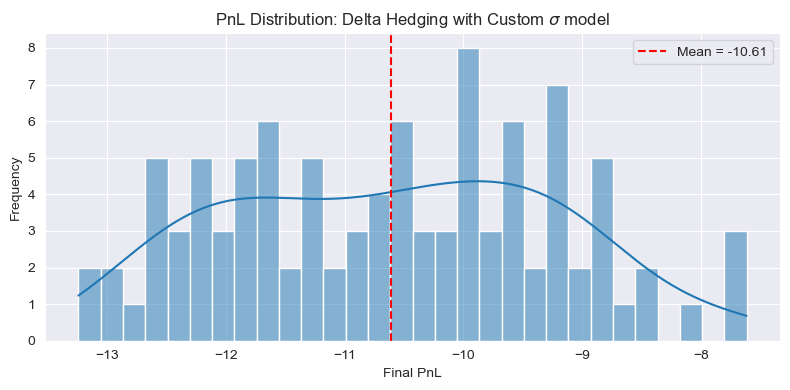

In [169]:
sigma_guess = 0.25 # constant volatility assumed by the trader

#simulated_paths = stock_path_custom_sigma(S0, T, r, mu, n_paths, n_steps)
pnl_list, v_paths = simulate_delta_hedging(simulated_paths, K, r, sigma_guess, T)

# Step 5: Plot results
plt.figure(figsize=(8, 4))
sns.histplot(pnl_list, kde=True, bins=30)
plt.title("PnL Distribution: Delta Hedging with Custom $\sigma$ model")
plt.xlabel("Final PnL")
plt.ylabel("Frequency")
plt.axvline(np.mean(pnl_list), color='red', linestyle='--', label=f"Mean = {np.mean(pnl_list):.2f}")
plt.legend()
plt.tight_layout()
plt.show()

The above histogram shows the profit and loss (PnL) outcomes from delta hedging a call option when the actual volatility varies over time in a sinusoidal pattern, but the hedge assumes a constant volatility of 0.25.

Red-dashed line shows: $ \text{Mean PnL} \approx -10.61$.

**Observations**

- Negative mean --> this strategy constantly loses money
- Difference in the volatilities leads to systematic error
- No positive PnL: the strategy consistenly overestimated or underestimated the delta

### Testing what happens to PnL if the trader had known the sinusoidal volatility function

In [170]:
def simulate_delta_hedging_true_sigma(S_paths, times, K, r, T):
    dt = T / (len(times) - 1)
    pnl_list = []

    for path in S_paths:
        cash = 0
        delta_prev = 0
        for t_idx in range(len(times) - 1):
            t = times[t_idx]
            tau = T - t
            S_t = path[t_idx]
            sigma = sigma_t_func(t)

            delta = bs_delta_call(S_t, K, r, sigma, tau)
            d_delta = delta - delta_prev
            cash -= d_delta * S_t
            cash *= np.exp(r * dt)
            delta_prev = delta

        S_T = path[-1]
        option_payoff = max(S_T - K, 0)
        portfolio_value = delta_prev * S_T + cash
        pnl = portfolio_value - option_payoff
        pnl_list.append(pnl)

    return np.array(pnl_list)

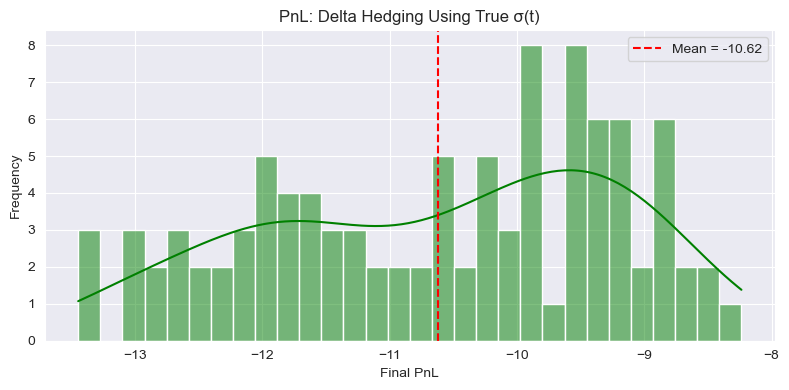

In [171]:
pnl_true_sigma = simulate_delta_hedging_true_sigma(simulated_paths, times, K, r, T)

plt.figure(figsize=(8, 4))
sns.histplot(pnl_true_sigma, kde=True, bins=30, color='green')
plt.axvline(np.mean(pnl_true_sigma), color='red', linestyle='--', label=f"Mean = {np.mean(pnl_true_sigma):.2f}")
plt.title("PnL: Delta Hedging Using True σ(t)")
plt.xlabel("Final PnL")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

**Observations**

- The trader recalculates the hedge at each timestep using the correct time-varying volatility.

- $ \text{Mean PnL} \approx -10.62$.

- So, even with perfect knowledge of how volatility changes, the trader still loses money on average.

- Thus, knowing the correct $\sigma(t)$ helps make more accurate hedging adjustments but delta hedging alone isn't enough to eliminate losses when volatility changes over time (as it only neutralizes the risk from small changes in stock price).

### Simulating Stock Paths from Heston, GARCH(1,1), SABR Models

- To evaluate how delta hedging performs when the underlying stock follows a model with non-constant volatility. 
- I used three popular models: Heston, GARCH(1,1), and SABR.
- I simulated 100 stock price paths over a one-year period. The delta hedge was implemented assuming a constant volatility (σ = 0.25).

In [172]:
dt = T / (n_steps - 1)
time_grid = np.linspace(0, T, n_steps)

In [189]:
def plot_sample_paths(S_paths, label):
    plt.figure(figsize=(8, 4))
    for i in range(min(10, len(S_paths))):
        plt.plot(time_grid, S_paths[i])
    plt.title(f"Sample Paths - {label}")
    plt.xlabel("Time (years)")
    plt.ylabel("Stock Price")
    plt.grid(True)
    plt.show()

def plot_pnl_distributions(pnl_dict):
    plt.figure(figsize=(10, 5))
    bins = np.linspace(min(np.min(pnl) for pnl in pnl_dict.values()), 
                       max(np.max(pnl) for pnl in pnl_dict.values()), 30)

    for label, pnl_array in pnl_dict.items():
        plt.hist(pnl_array, bins=bins, density=True, alpha=0.3, label=f"{label} (hist)")
        kde = gaussian_kde(pnl_array)
        x_vals = np.linspace(min(pnl_array), max(pnl_array), 1000)
        plt.plot(x_vals, kde(x_vals), label=f"{label} (KDE)")
    
    plt.title("PnL Distributions: Delta Hedging under Different Volatility Models")
    plt.xlabel("PnL")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def get_summary_stats(pnl_array):
    return {
        "Mean": np.mean(pnl_array),
        "Std Dev": np.std(pnl_array),
        "Median": np.median(pnl_array),
        "Min": np.min(pnl_array),
        "Max": np.max(pnl_array)
    }


In [190]:
#Heston Model

def simulate_heston_paths(S0, T, r, mu, n_paths, n_steps, 
                          v0=0.04, kappa=2.0, theta=0.04, sigma=0.3, rho=-0.7):
    dt = T / (n_steps - 1)
    S_paths = np.zeros((n_paths, n_steps))
    v_paths = np.zeros((n_paths, n_steps))
    
    S_paths[:, 0] = S0
    v_paths[:, 0] = v0

    for i in range(n_paths):
        for t in range(1, n_steps):
            z1 = np.random.normal()
            z2 = np.random.normal()
            w1 = z1
            w2 = rho * z1 + np.sqrt(1 - rho**2) * z2

            vt_prev = v_paths[i, t-1]
            vt_next = np.abs(
                vt_prev + kappa * (theta - vt_prev) * dt + sigma * np.sqrt(vt_prev * dt) * w2
            )
            v_paths[i, t] = vt_next

            S_prev = S_paths[i, t-1]
            S_next = S_prev * np.exp((mu - 0.5 * vt_prev) * dt + np.sqrt(vt_prev * dt) * w1)
            S_paths[i, t] = S_next

    return S_paths,v_paths

#GARCH(1,1)

def simulate_garch_paths(S0, T, r, mu, n_paths, n_steps, 
                         omega=0.000005, alpha=0.05, beta=0.94):
    dt = T / (n_steps - 1)
    S_paths = np.zeros((n_paths, n_steps))
    sigma2_paths = np.zeros((n_paths, n_steps))
    
    S_paths[:, 0] = S0
    sigma2_paths[:, 0] = 0.04  # initial variance

    for i in range(n_paths):
        for t in range(1, n_steps):
            epsilon = np.random.normal()
            sigma2_paths[i, t] = (
                omega + alpha * (epsilon**2) * sigma2_paths[i, t-1] + beta * sigma2_paths[i, t-1]
            )
            sigma_t = np.sqrt(sigma2_paths[i, t])
            S_paths[i, t] = S_paths[i, t-1] * np.exp((mu - 0.5 * sigma_t**2) * dt + sigma_t * np.sqrt(dt) * epsilon)

    return S_paths,sigma2_paths

#SABR

def simulate_sabr_paths(S0, T, r, mu, n_paths, n_steps,
                        alpha=0.3, beta=0.5, rho=-0.3, vol_of_vol=0.4):
    dt = T / (n_steps - 1)
    S_paths = np.zeros((n_paths, n_steps))
    sigma_paths = np.zeros((n_paths, n_steps))

    S_paths[:, 0] = S0
    sigma_paths[:, 0] = alpha

    for i in range(n_paths):
        for t in range(1, n_steps):
            z1 = np.random.normal()
            z2 = np.random.normal()
            dW1 = z1
            dW2 = rho * z1 + np.sqrt(1 - rho**2) * z2

            sigma_prev = sigma_paths[i, t-1]
            sigma_next = sigma_prev * np.exp(vol_of_vol * np.sqrt(dt) * dW2 - 0.5 * vol_of_vol**2 * dt)
            sigma_paths[i, t] = sigma_next

            S_prev = S_paths[i, t-1]
            dS = sigma_prev * (S_prev ** beta) * np.sqrt(dt) * dW1
            S_paths[i, t] = S_prev + dS

    return S_paths, sigma_paths ** 2



--- Heston ---


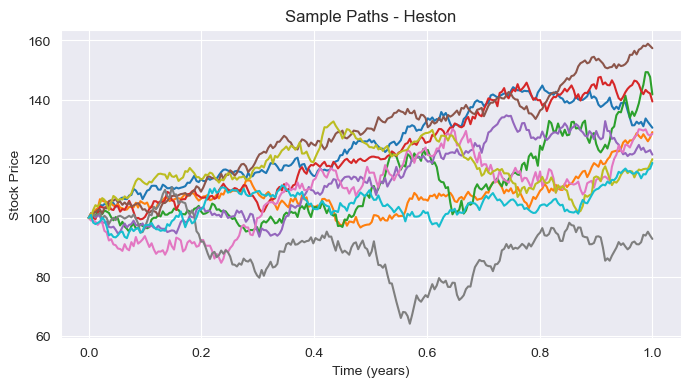


--- GARCH(1,1) ---


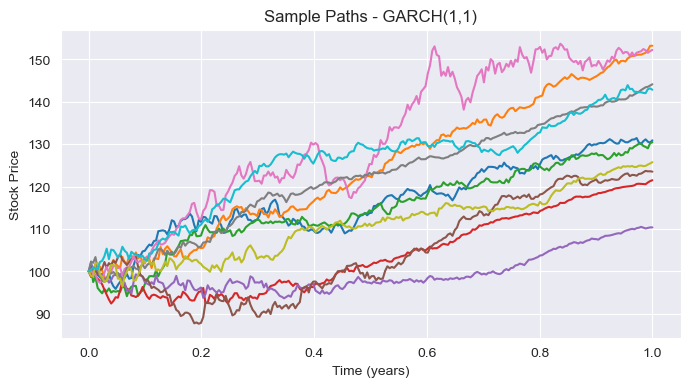


--- SABR ---


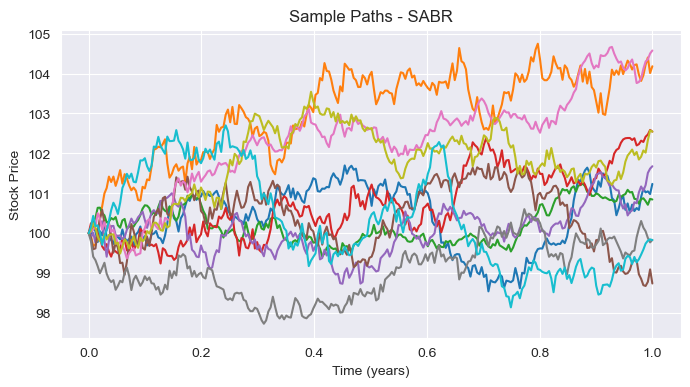

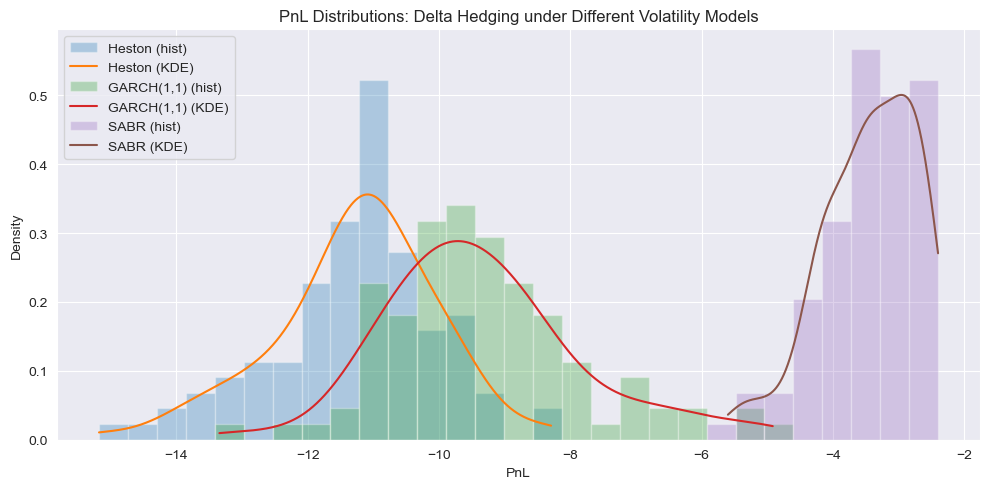

,Mean,Std Dev,Median,Min,Max
Heston,-11.2656,1.2312,-11.1411,-15.1783,-8.2931
"GARCH(1,1)",-9.3523,1.5022,-9.5270,-13.3449,-4.9165
SABR,-3.4482,0.7196,-3.4176,-5.5994,-2.3987


In [191]:
models = {
    "Heston": simulate_heston_paths(S0, T, r, mu, n_paths, n_steps),
    "GARCH(1,1)": simulate_garch_paths(S0, T, r, mu, n_paths, n_steps),
    "SABR": simulate_sabr_paths(S0, T, r, mu, n_paths, n_steps)
}

pnl_results = {}
summary_table = {}

for model_name, (S_paths, V_paths) in models.items():
    print(f"\n--- {model_name} ---")
    plot_sample_paths(S_paths, model_name)
    
    # Delta hedging with constant volatility guess
    pnl, v_paths = simulate_delta_hedging(S_paths, K, r, sigma_guess, T)
    
    pnl_results[model_name] = pnl
    summary_table[model_name] = get_summary_stats(pnl)

plot_pnl_distributions(pnl_results)

summary_df = pd.DataFrame(summary_table).T
display(summary_df.round(4))


For the Heston model, 

- Mean PnL $\approx$ −11.17 with relatively low variability across simulations (standard deviation = 0.96) --> So, while the error is consistent, the strategy systematically underperforms. 
- The persistent mismatch arises because volatility in the Heston model evolves stochastically and reverts to a mean, which cannot be captured by a static hedge.

For the GARCH(1,1) model, 

- Mean PnL $\approx$ −9.39, less negative than in Heston, but the distribution was more dispersed (standard deviation = 1.54). 
- This indicates that the hedging strategy was less predictable and more sensitive to volatility clustering effects. 
- Large swings in volatility from one time step to the next tend to introduce sporadic hedging errors.

For the SABR model,

- Best performance among the three. 
- Mean PnL $\approx$ −3.61 --> relatively tight distribution. 
- The volatility dynamics were smoother/more favorable for delta hedging under the chosen parameters. 
- The smaller loss and tighter spread --> fewer extreme mis-hedging events.


$\therefore$ Although the results have improved from before, the PnL is still negative, suggesting consistent losses with just Delta Hedging.

So, I explore Vega/Sigma hedging where the volatility is also hedged, which neutralizes the risk from changes in volatility.



### Static Sigma Hedging: Using a Fixed Vega Ratio
In this approach, the Vega hedge is set up at the beginning of the hedging period by computing the ratio of Vega sensitivities of two options under the Black-Scholes model. This fixed ratio (denoted as 
w
w) is used throughout the simulation to hedge volatility exposure. While simple and computationally efficient, it assumes the market conditions remain stable, which limits its effectiveness under stochastic volatility models.

2-part strategy:
- Delta hedge: using stock
- Sigma hedge: using a second option (having different K, fixed throughout)

I hold:
- A position in the stock (for delta)
- A position in a second option (for vega)
- Cash (residual)

Strategy:

1. Simulate stock paths using Heston and SABR and extract the time series of Stock prices $\S_t$ and Instantaneous volatility $\sigma_t$ (for Heston/SABR)
2. Assume access to a secondary option for vega hedging (a call with K')
3. At $t=0$, calculate: Delta and Vega of the main option, Vega of the secondary option
4. Compute the vega hedge ratio: $( \omega = -\frac{\text{Vega}_{\text{main}}}{\text{Vega}_{\text{secondary}}})$ and fix $\omega$ for the entire hedging period.

In [183]:
#Black-Scholes Vega
def bs_vega(S, K, r, sigma, T):
    with np.errstate(divide='ignore', invalid='ignore'):
        d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
        vega = S * norm.pdf(d1) * np.sqrt(T)
    return np.nan_to_num(vega)

#To simulate delta and delta+vega hedging P&L on a set of stock and volatility paths:
def simulate_hedging_pnl(S_paths, vol_paths, K1, K2, r, T, n_steps, strategy='delta', w=None):
    dt = T / (n_steps - 1)
    n_paths = S_paths.shape[0]
    pnl = np.zeros(n_paths)

    for i in range(n_paths):
        S = S_paths[i]
        sigma = np.sqrt(vol_paths[i]) if vol_paths is not None else np.full_like(S, sigma_guess)
        cash = 0
        stock_position = 0

        for t in range(n_steps - 1):
            tau = T - t * dt
            delta1 = bs_delta_call(S[t], K1, r, sigma[t], tau)

            if strategy == 'delta':
                target_position = -delta1

            elif strategy == 'deltavega_static':
                delta2 = bs_delta_call(S[t], K2, r, sigma[t], tau)
                total_delta = -delta1 - w * delta2
                target_position = total_delta

            elif strategy == 'deltavega_dynamic':
                vega1 = bs_vega(S[t], K1, r, sigma[t], tau)
                vega2 = bs_vega(S[t], K2, r, sigma[t], tau)
                dynamic_w = -vega1 / vega2 if vega2 != 0 else 0.0

                delta2 = bs_delta_call(S[t], K2, r, sigma[t], tau)
                total_delta = -delta1 - dynamic_w * delta2
                target_position = total_delta

            else:
                raise ValueError("strategy must be 'delta', 'deltavega_static', or 'deltavega_dynamic'")

            cash *= np.exp(r * dt)
            cash -= (target_position - stock_position) * S[t]
            stock_position = target_position

        final_price = S[-1]
        option1_payoff = max(final_price - K1, 0)

        if strategy == 'deltavega_static':
            option2_payoff = max(final_price - K2, 0) * w
        elif strategy == 'deltavega_dynamic':
            # Recompute w one last time
            tau = dt  # very short maturity
            sigma_T = sigma[-1]
            vega1 = bs_vega(final_price, K1, r, sigma_T, tau)
            vega2 = bs_vega(final_price, K2, r, sigma_T, tau)
            dynamic_w = -vega1 / vega2 if vega2 != 0 else 0.0
            option2_payoff = max(final_price - K2, 0) * dynamic_w
        else:
            option2_payoff = 0

        cash *= np.exp(r * dt)
        cash += stock_position * final_price
        pnl[i] = cash - option1_payoff - option2_payoff

    return pnl


def print_summary_stats(pnl_array, label):
    stats = get_summary_stats(pnl_array)
    print(f"Summary Stats for {label}")
    for k, v in stats.items():
        print(f"{k}: {v:.4f}")
    print()


**Observations:**

- As expected, delta hedging alone performs poorly under stochastic volatility.
- Delta + Vega hedging significantly reduces losses and variance, making it much more suitable in Heston-like regimes.
- There’s still a small bias (mean < 0) which is expected as we’re still using Black-Scholes formulas to hedge a non-Black-Scholes world.



--- Heston ---

--- GARCH(1,1) ---

--- SABR ---


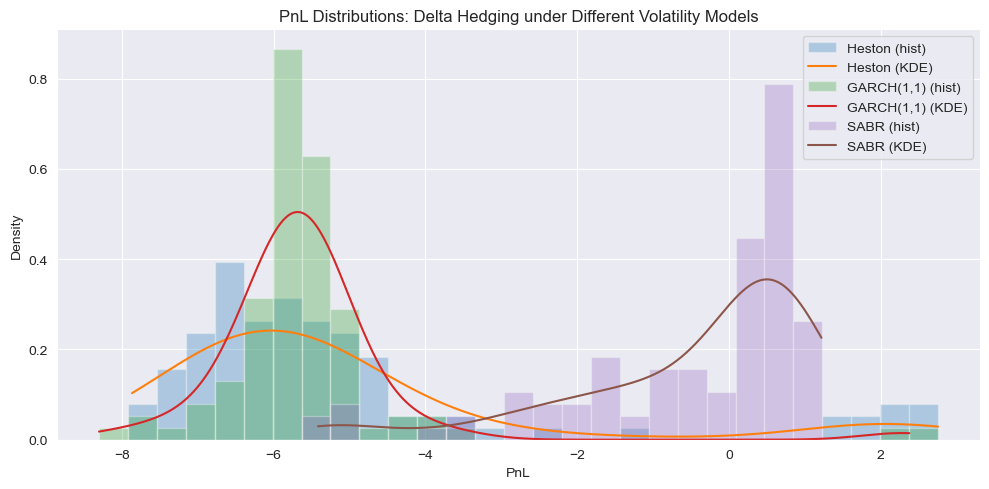

,Mean,Std Dev,Median,Min,Max
Heston,-5.0380,2.6145,-5.8027,-7.8652,2.7530
"GARCH(1,1)",-5.5749,1.3307,-5.6968,-8.2998,2.3750
SABR,-0.4894,1.6275,0.2705,-5.4150,1.2169


In [184]:
pnl_results_dv = {}
summary_table_dv = {}

for model_name, (S_paths, V_paths) in models.items():
    print(f"\n--- {model_name} ---")
    # Delta + Vega hedging
    pnl = simulate_hedging_pnl(S_paths, V_paths, K1=K, K2=K+5, w=-1.023, r=r, T=T, n_steps=n_steps, strategy='deltavega_static')
    
    pnl_results_dv[f"{model_name}"] = pnl
    summary_table_dv[f"{model_name}"] = get_summary_stats(pnl)

plot_pnl_distributions(pnl_results_dv)
summary_df_dv = pd.DataFrame(summary_table_dv).T
display(summary_df_dv.round(4))



**Observations**

- SABR model shows a tight PnL distribution centered near 0 → hedge worked very well.
- GARCH model also shows a relatively narrow spread → Vega hedge reduced volatility risk.
- Heston model has wider spread but still better than no Vega hedge.

### Dynamic sigma hedging: Updating the Vega hedge ratio $( \omega )$ continuously
 
 At each rebalancing step:

- The Vegas of both the main option and the secondary option are recalculated using the current stock price, volatility, and time to maturity.
- A new hedge ratio is computed as $( \omega_t = -\frac{\text{Vega}_{\text{main}}(t)}{\text{Vega}_{\text{secondary}}(t)})$.
- This updated $( \omega_t )$ determines how many secondary options to hold at that moment.

As a result, both the delta and vega positions evolve over time, allowing the portfolio to remain more robust to changes in market volatility.


--- Heston ---

--- GARCH(1,1) ---

--- SABR ---


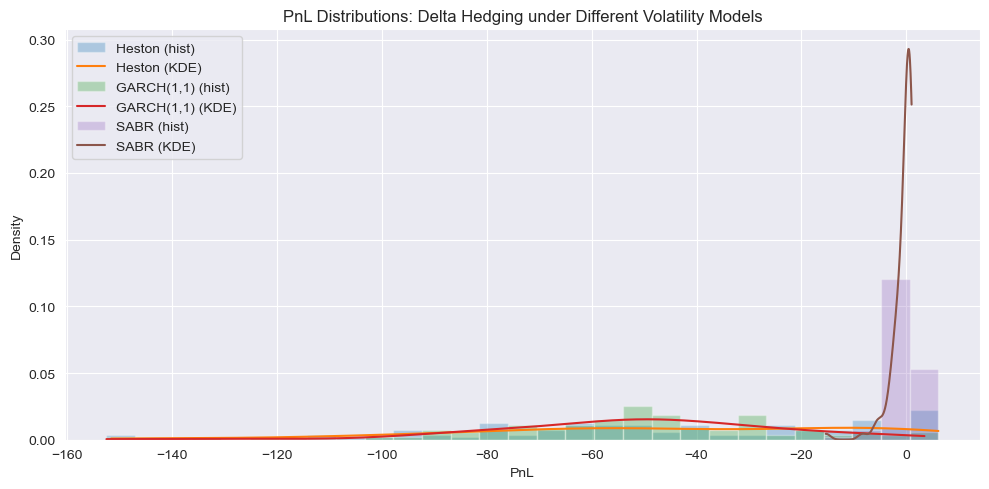

,Mean,Std Dev,Median,Min,Max
Heston,-46.4526,38.5983,-47.1303,-151.6636,6.1414
"GARCH(1,1)",-50.9873,27.7851,-50.1194,-152.5627,3.4825
SABR,-0.5567,2.2463,0.4322,-15.3473,1.0265


In [185]:
pnl_results_dvd = {}
summary_table_dvd = {}

for model_name, (S_paths, V_paths) in models.items():
    print(f"\n--- {model_name} ---")
    # Delta + Vega hedging
    pnl = simulate_hedging_pnl(S_paths, V_paths, K1=K, K2=K+5, w=-1.023, r=r, T=T, n_steps=n_steps, strategy='deltavega_dynamic')
    
    pnl_results_dvd[f"{model_name}"] = pnl
    summary_table_dvd[f"{model_name}"] = get_summary_stats(pnl)

plot_pnl_distributions(pnl_results_dvd)
summary_df_dvd = pd.DataFrame(summary_table_dvd).T
display(summary_df_dvd.round(4))

**Observations**

- SABR remains stable but with slightly more spread than static case.
- GARCH shows a much wider distribution with heavier losses.
- Heston displays significant left tail risk and higher variance.

### SUMMARY

- Delta-only hedging leads to large losses and high variance under stochastic volatility models.
- Adding a static Vega hedge significantly improves PnL stability, especially under GARCH and SABR.
- SABR model is the easiest to hedge, showing tight PnL distributions across strategies.
- Dynamic Vega hedging did not outperform static — in fact, it often introduced more instability.
- Errors in dynamically computing Vega ratios may lead to over-hedging or under-hedging.
- Overall, static sigma hedging offers a good balance between simplicity and effectiveness.
